In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../data")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "Accident_Information.csv.bz2" "Vehicle_Information.csv.bz2"

In [2]:
library(DataExplorer)

In [3]:
system.time(Accident_data <- read.csv("../data/Accident_Information.csv.bz2"))
system.time(Vehicle_data <- read.csv("../data//Vehicle_Information.csv.bz2"))

   user  system elapsed 
134.819   1.273 136.170 

   user  system elapsed 
117.250   0.476 117.756 

In [4]:
str(Accident_data)

'data.frame':	1917274 obs. of  34 variables:
 $ Accident_Index                             : Factor w/ 1917274 levels "200501BS00001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ X1st_Road_Class                            : Factor w/ 6 levels "A","A(M)","B",..: 1 3 4 1 6 6 4 1 1 3 ...
 $ X1st_Road_Number                           : int  3218 450 0 3220 0 0 0 315 3212 450 ...
 $ X2nd_Road_Class                            : Factor w/ 6 levels "A","A(M)","B",..: NA 4 NA NA NA NA 6 NA 3 4 ...
 $ X2nd_Road_Number                           : int  0 0 0 0 0 0 0 0 304 0 ...
 $ Accident_Severity                          : Factor w/ 3 levels "Fatal","Serious",..: 2 3 3 3 3 3 3 3 3 3 ...
 $ Carriageway_Hazards                        : Factor w/ 7 levels "Any animal in carriageway (except ridden horse)",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Date                                       : Factor w/ 4383 levels "2005-01-01","2005-01-02",..: 4 5 6 7 10 11 13 14 15 15 ...
 $ Day_of_Week                                : Fact

In [5]:
str(Vehicle_data)

'data.frame':	2177205 obs. of  24 variables:
 $ Accident_Index                  : Factor w/ 1488981 levels "200401BS00001",..: 1 2 3 3 4 4 5 6 7 8 ...
 $ Age_Band_of_Driver              : Factor w/ 12 levels "0 - 5","11 - 15",..: 5 5 5 10 5 6 5 6 7 5 ...
 $ Age_of_Vehicle                  : int  3 NA 4 NA 1 10 NA NA 3 4 ...
 $ Driver_Home_Area_Type           : Factor w/ 4 levels "Data missing or out of range",..: 4 4 1 1 4 1 4 4 1 4 ...
 $ Driver_IMD_Decile               : int  4 3 NA NA 4 NA 4 8 NA 6 ...
 $ Engine_Capacity_.CC.            : int  1588 NA 998 NA 124 1781 NA NA 2685 2300 ...
 $ Hit_Object_in_Carriageway       : Factor w/ 13 levels "Any animal (except ridden horse)",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ Hit_Object_off_Carriageway      : Factor w/ 13 levels "Bus stop or bus shelter",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Journey_Purpose_of_Driver       : Factor w/ 8 levels "Commuting to/from work",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Junction_Location               : Factor w/ 10 levels "Appro

In [6]:
head(Accident_data)
summary(Accident_data)

Accident_Index,X1st_Road_Class,X1st_Road_Number,X2nd_Road_Class,X2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,⋯,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
200501BS00001,A,3218,NA,0,Serious,None,2005-01-04,Tuesday,1,⋯,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
200501BS00002,B,450,C,0,Slight,None,2005-01-05,Wednesday,1,⋯,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
200501BS00003,C,0,NA,0,Slight,None,2005-01-06,Thursday,1,⋯,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
200501BS00004,A,3220,NA,0,Slight,None,2005-01-07,Friday,1,⋯,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
200501BS00005,Unclassified,0,NA,0,Slight,None,2005-01-10,Monday,1,⋯,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
200501BS00006,Unclassified,0,NA,0,Slight,None,2005-01-11,Tuesday,1,⋯,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No


       Accident_Index        X1st_Road_Class   X1st_Road_Number
 200501BS00001:      1   A           :870268   Min.   :   0    
 200501BS00002:      1   A(M)        :  5141   1st Qu.:   0    
 200501BS00003:      1   B           :243115   Median : 124    
 200501BS00004:      1   C           :166972   Mean   :1002    
 200501BS00005:      1   Motorway    : 73641   3rd Qu.: 720    
 200501BS00006:      1   Unclassified:558137   Max.   :9999    
 (Other)      :1917268                         NA's   :2       
     X2nd_Road_Class   X2nd_Road_Number Accident_Severity
 A           :188538   Min.   :   0.0   Fatal  :  24693  
 A(M)        :  1410   1st Qu.:   0.0   Serious: 263805  
 B           : 74846   Median :   0.0   Slight :1628776  
 C           : 87348   Mean   : 377.7                    
 Motorway    : 12692   3rd Qu.:   0.0                    
 Unclassified:762580   Max.   :9999.0                    
 NA's        :789860   NA's   :17440                     
                        

In [7]:
sapply(Accident_data, class)

Accident_Index 
                                   "factor" 
                            X1st_Road_Class 
                                   "factor" 
                           X1st_Road_Number 
                                  "integer" 
                            X2nd_Road_Class 
                                   "factor" 
                           X2nd_Road_Number 
                                  "integer" 
                          Accident_Severity 
                                   "factor" 
                        Carriageway_Hazards 
                                   "factor" 
                                       Date 
                                   "factor" 
                                Day_of_Week 
                                   "factor" 
Did_Police_Officer_Attend_Scene_of_Accident 
                                  "integer" 
                           Junction_Control 
                                   "factor" 
                            Junction_Detail 
                                   "factor" 
                                   Latitude 
                                  "numeric" 
                           Light_Conditions 
                                   "factor" 
                 Local_Authority_.District. 
                                   "factor" 
                  Local_Authority_.Highway. 
                                   "factor" 
                      Location_Easting_OSGR 
                                  "integer" 
                     Location_Northing_OSGR 
                                  "integer" 
                                  Longitude 
                                  "numeric" 
                  LSOA_of_Accident_Location 
                                   "factor" 
                       Number_of_Casualties 
                                  "integer" 
                         Number_of_Vehicles 
                                  "integer" 
          Pedestrian_Crossing.Human_Control 
                                  "integer" 
    Pedestrian_Crossing.Physical_Facilities 
                                  "integer" 
                               Police_Force 
                                   "factor" 
                    Road_Surface_Conditions 
                                   "factor" 
                                  Road_Type 
                                   "factor" 
                 Special_Conditions_at_Site 
                                   "factor" 
                                Speed_limit 
                                  "integer" 
                                       Time 
                                   "factor" 
                        Urban_or_Rural_Area 
                                   "factor" 
                         Weather_Conditions 
                                   "factor" 
                                       Year 
                                  "integer" 
                                 InScotland 
                                   "factor"

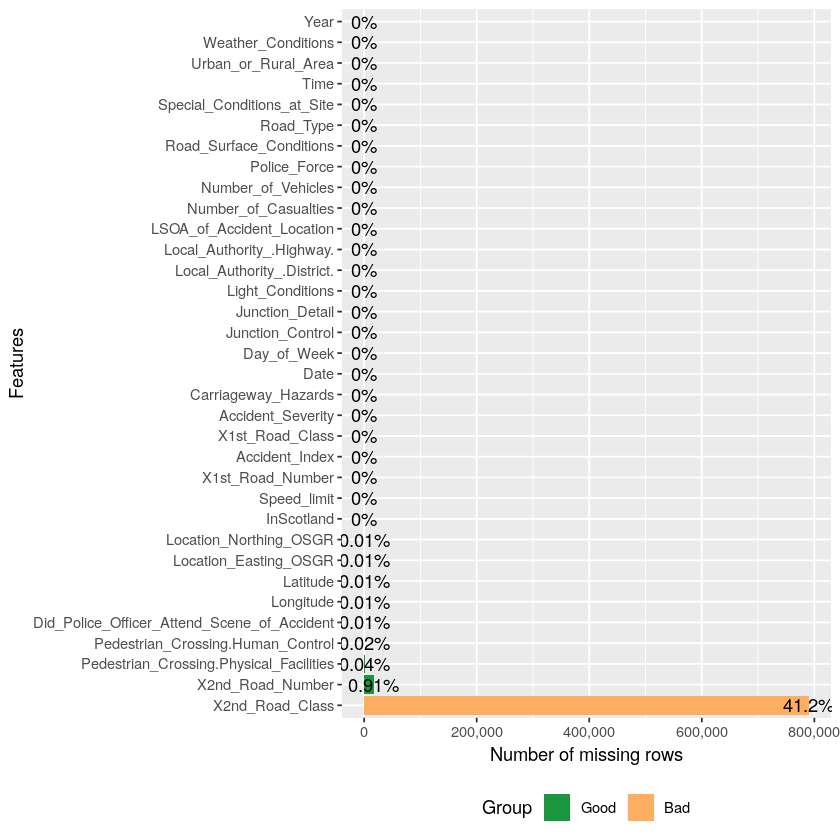

In [8]:
plot_missing(Accident_data)

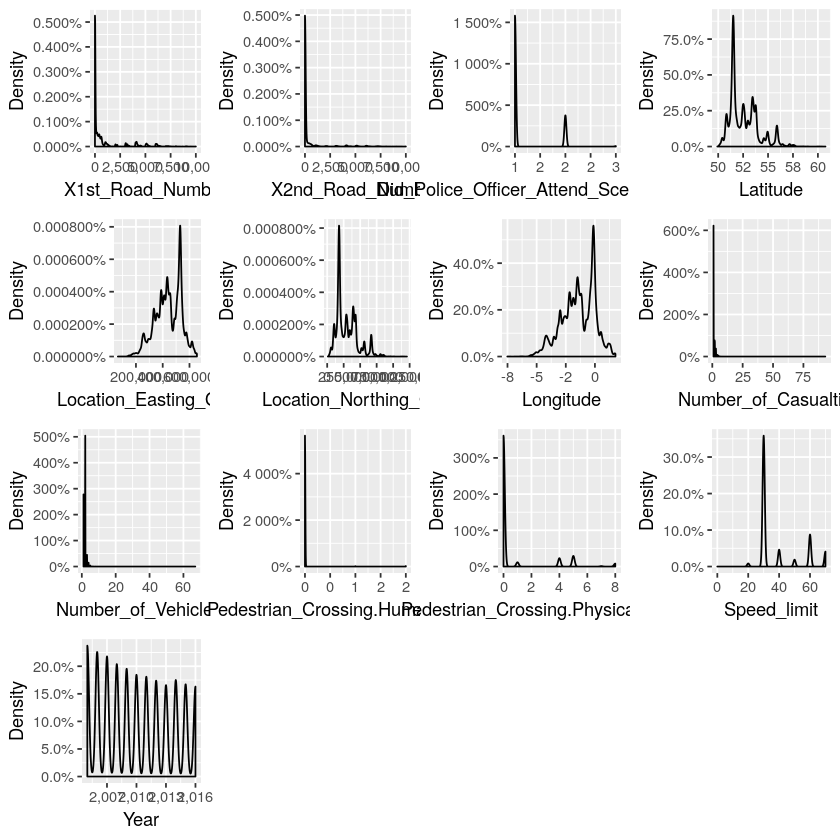

In [9]:
plot_density(Accident_data)

7 columns ignored with more than 50 categories.
Accident_Index: 1917274 categories
Date: 4383 categories
Local_Authority_.District.: 416 categories
Local_Authority_.Highway.: 207 categories
LSOA_of_Accident_Location: 35543 categories
Police_Force: 51 categories
Time: 1440 categories



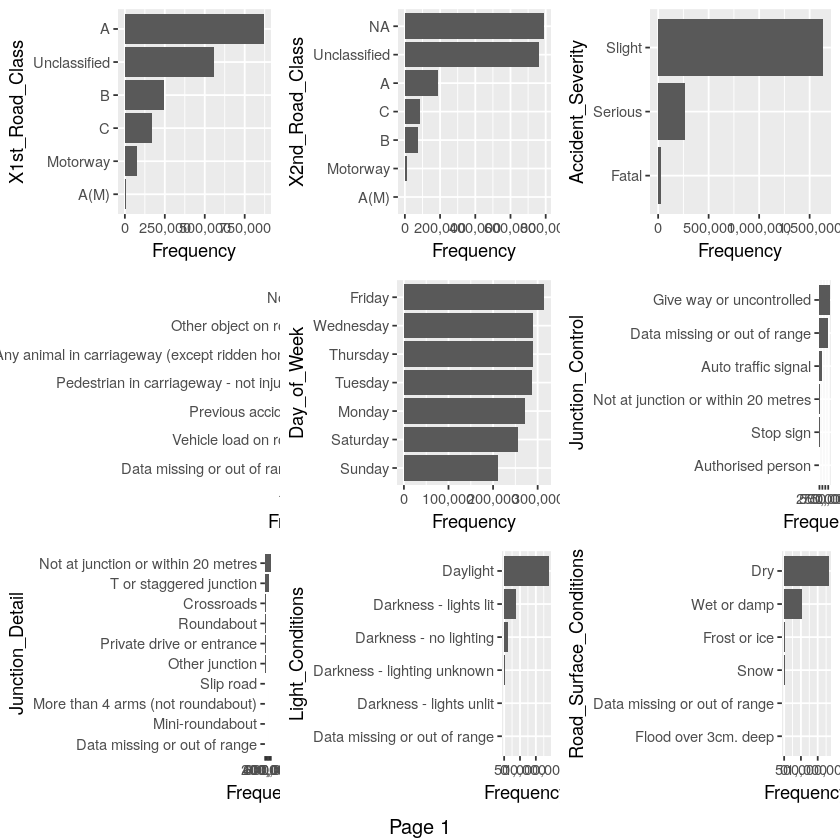

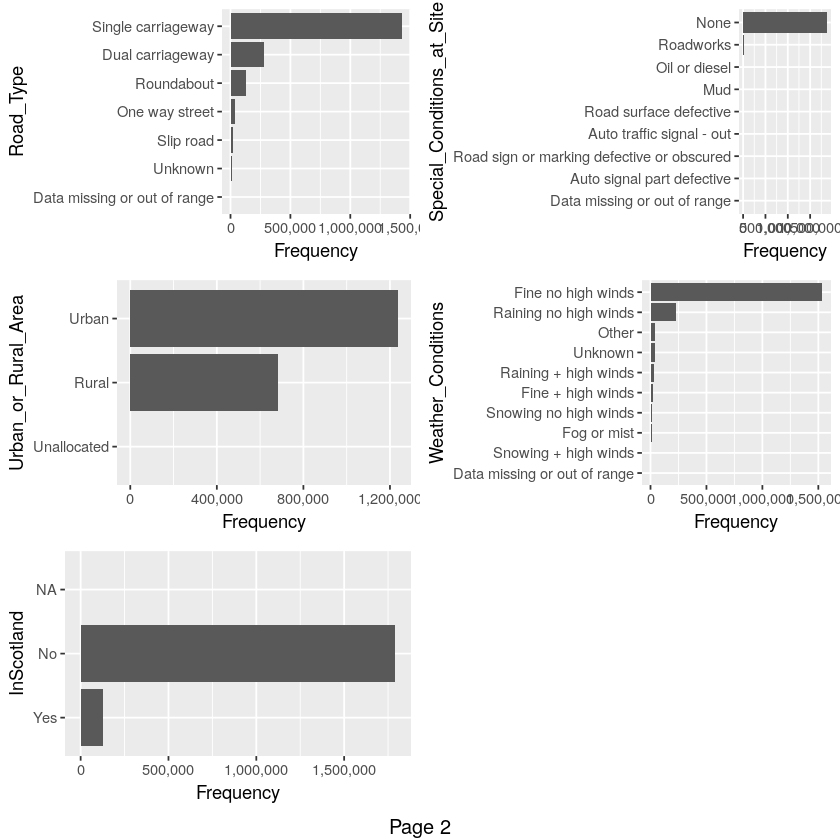

In [10]:
plot_bar(Accident_data)

Warning message:
“Removed 19479 rows containing non-finite values (stat_boxplot).”

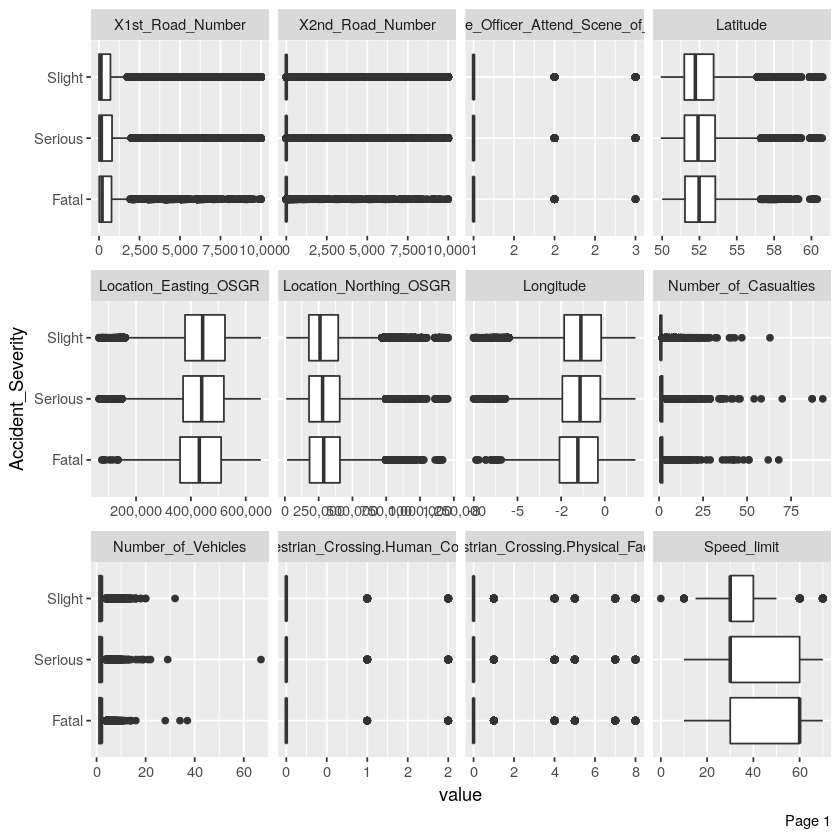

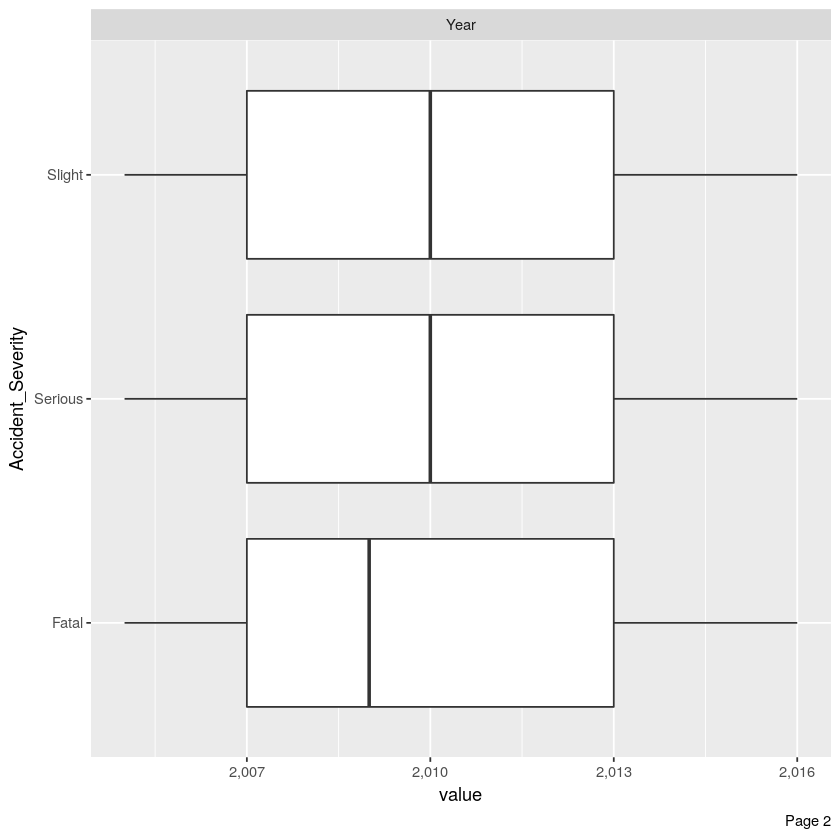

In [11]:
plot_boxplot(Accident_data, by='Accident_Severity')

In [ ]:
plot_scatterplot(Accident_data, by="Accident_Severity", size=0.5)

Warning message:
“Removed 18301 rows containing missing values (geom_point).”

In [12]:
head(Vehicle_data)
summary(Vehicle_data)

Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,⋯,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
200401BS00001,26 - 35,3,Urban area,4,1588,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,109,Data missing or out of range,Front,2004
200401BS00002,26 - 35,NA,Urban area,3,NA,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,1,109,Data missing or out of range,Front,2004
200401BS00003,26 - 35,4,Data missing or out of range,NA,998,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,Turning right,1,109,Data missing or out of range,Front,2004
200401BS00003,66 - 75,NA,Data missing or out of range,NA,NA,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,2,109,Data missing or out of range,Front,2004
200401BS00004,26 - 35,1,Urban area,4,124,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004
200401BS00004,36 - 45,10,Data missing or out of range,NA,1781,None,None,Data missing or out of range,Data missing or out of range,⋯,None,No tow/articulation,Did not leave carriageway,0,U-turn,2,109,Data missing or out of range,Offside,2004


       Accident_Index    Age_Band_of_Driver Age_of_Vehicle  
 2013460234852:     53   26 - 35:450531     Min.   :  1.0   
 201543P296025:     37   36 - 45:435686     1st Qu.:  3.0   
 2011160B00431:     24   46 - 55:348762     Median :  7.0   
 2009559D05333:     22   21 - 25:238765     Mean   :  7.1   
 201522D501706:     16   56 - 65:206181     3rd Qu.: 10.0   
 2016140142191:     16   16 - 20:175874     Max.   :111.0   
 (Other)      :2177037   (Other):321406     NA's   :358149  
                  Driver_Home_Area_Type Driver_IMD_Decile Engine_Capacity_.CC.
 Data missing or out of range: 334344   Min.   : 1.0      Min.   :    1       
 Rural                       : 232360   1st Qu.: 3.0      1st Qu.: 1299       
 Small town                  : 173903   Median : 5.0      Median : 1598       
 Urban area                  :1436598   Mean   : 5.4      Mean   : 2042       
                                        3rd Qu.: 8.0      3rd Qu.: 1997       
                                      

In [13]:
sapply(Vehicle_data, class)

Accident_Index               Age_Band_of_Driver 
                        "factor"                         "factor" 
                  Age_of_Vehicle            Driver_Home_Area_Type 
                       "integer"                         "factor" 
               Driver_IMD_Decile             Engine_Capacity_.CC. 
                       "integer"                        "integer" 
       Hit_Object_in_Carriageway       Hit_Object_off_Carriageway 
                        "factor"                         "factor" 
       Journey_Purpose_of_Driver                Junction_Location 
                        "factor"                         "factor" 
                            make                            model 
                        "factor"                         "factor" 
                 Propulsion_Code                    Sex_of_Driver 
                        "factor"                         "factor" 
        Skidding_and_Overturning          Towing_and_Articulation 
                        "factor"                         "factor" 
     Vehicle_Leaving_Carriageway Vehicle_Location.Restricted_Lane 
                        "factor"                        "integer" 
               Vehicle_Manoeuvre                Vehicle_Reference 
                        "factor"                        "integer" 
                    Vehicle_Type      Was_Vehicle_Left_Hand_Drive 
                        "factor"                         "factor" 
            X1st_Point_of_Impact                             Year 
                        "factor"                        "integer"

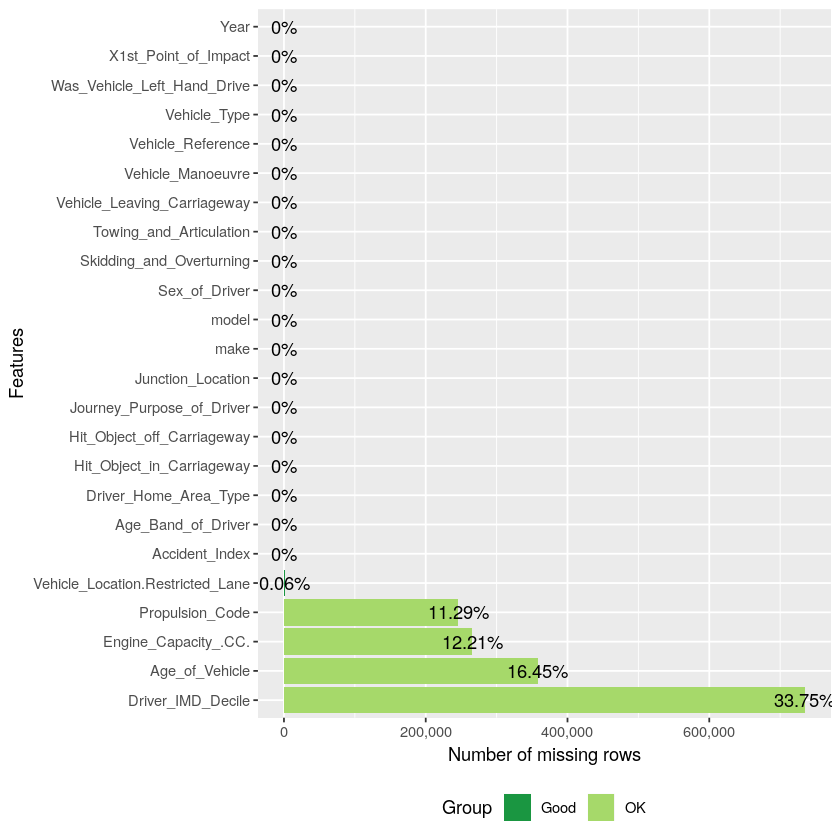

In [14]:
plot_missing(Vehicle_data)

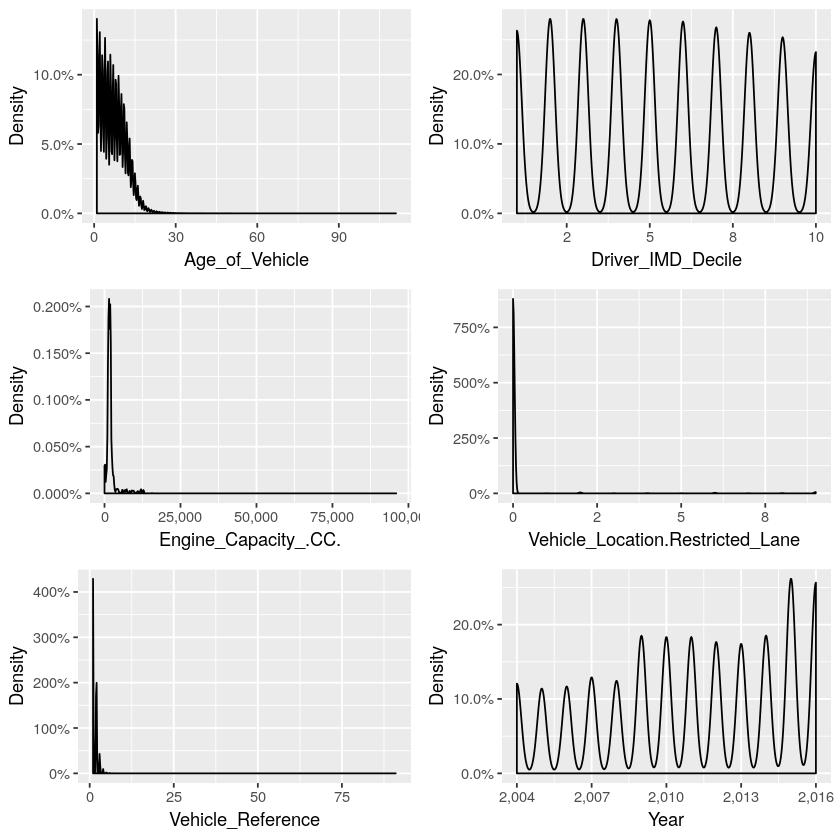

In [15]:
plot_density(Vehicle_data)

3 columns ignored with more than 50 categories.
Accident_Index: 1488981 categories
make: 536 categories
model: 35725 categories



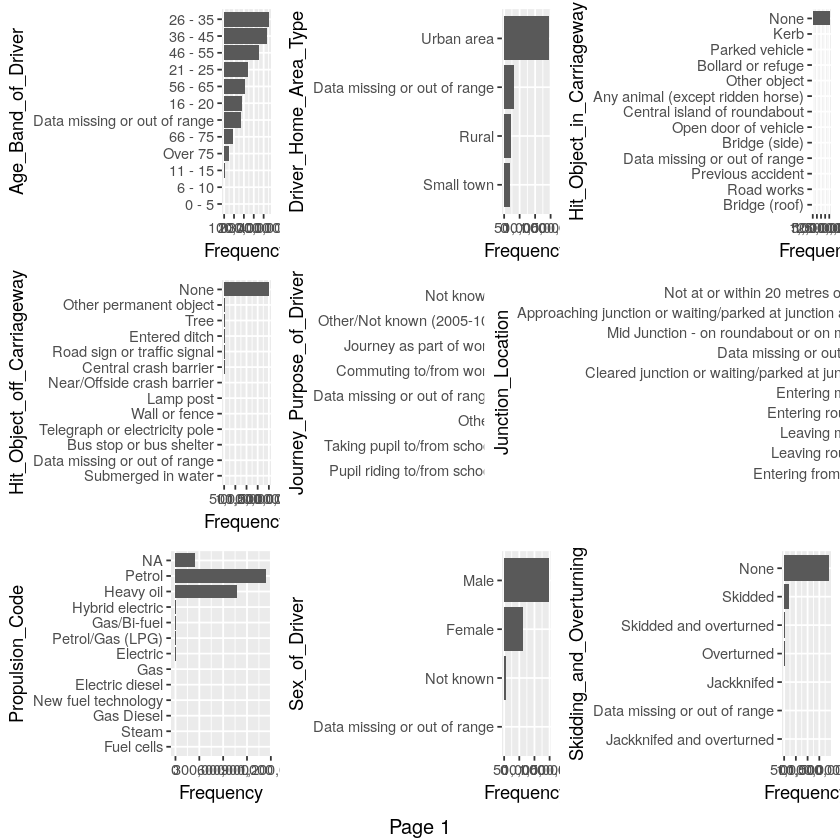

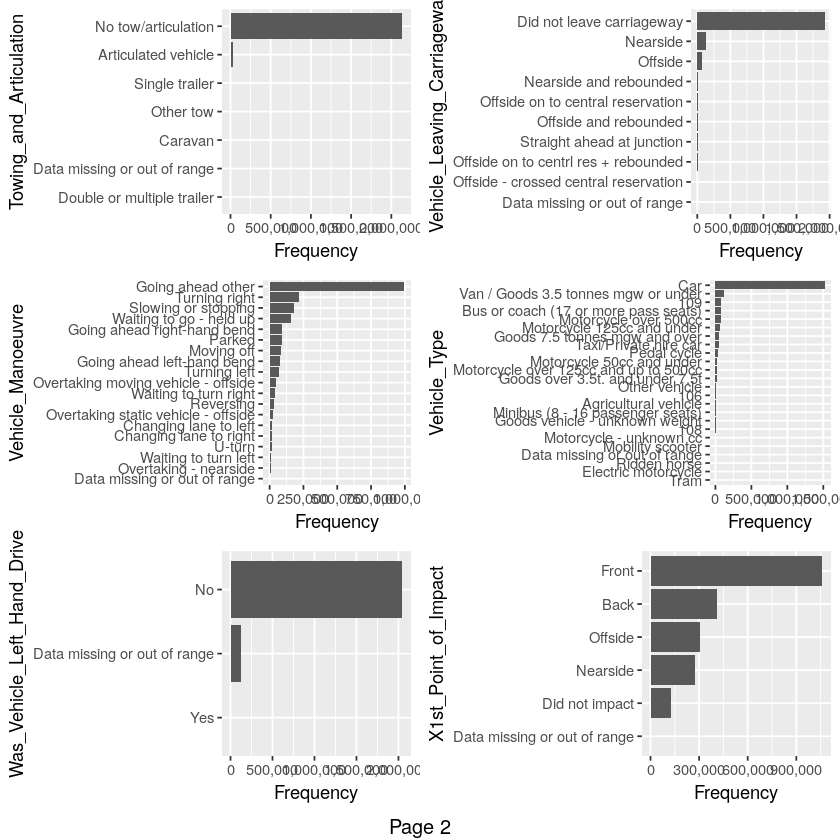

In [16]:
plot_bar(Vehicle_data)

Warning message:
“Removed 1360139 rows containing non-finite values (stat_boxplot).”

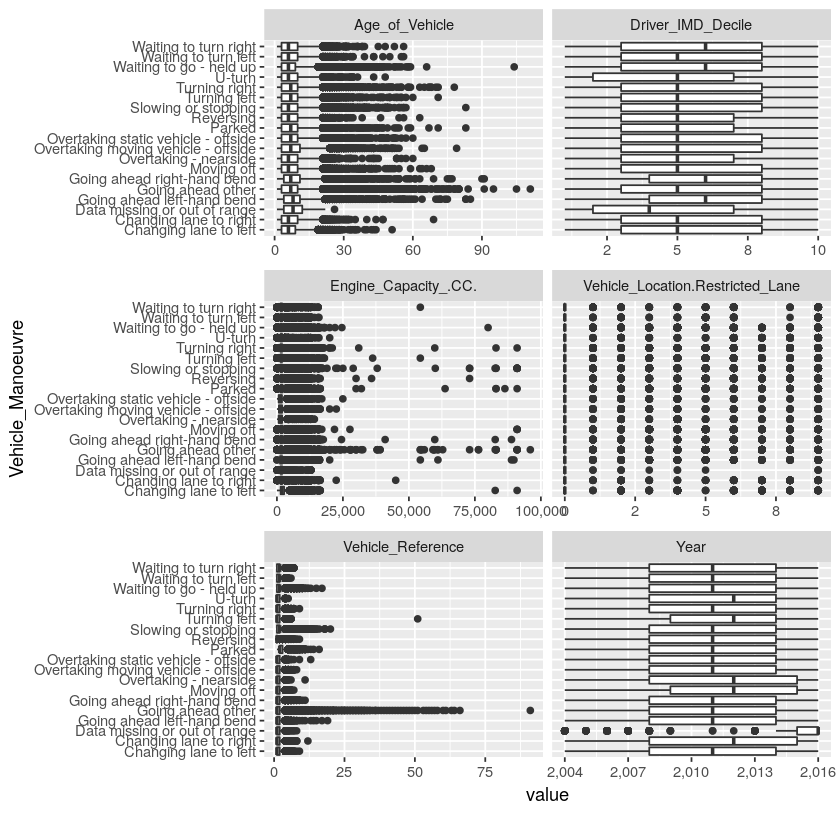

In [17]:
plot_boxplot(Vehicle_data, by='Vehicle_Manoeuvre')

In [ ]:
plot_sca